## Problem Statement
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## Importing the libraries 

In [277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Loading the data and gathering information about the file

In [278]:
df = pd.read_csv('./data/netflix_eda.csv')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [279]:
df.shape

(8807, 12)

Here we are spliting the file into two, one for TV shows and one for movies

In [280]:
df_movie = df[df['type'] == 'Movie']
df_shows = df[df['type'] == 'TV Show']

In [281]:
print(f'Shape of the movie dataframe: {df_movie.shape}')

Shape of the movie dataframe: (6131, 12)


In [282]:
print(f'Shape of the TV Shows dataframe: {df_shows.shape}')

Shape of the TV Shows dataframe: (2676, 12)


## Lets us now explore the TV Shows

In [283]:
df_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [284]:
df_shows.reset_index(inplace=True)

In [285]:
df_shows.shape

(2676, 13)

In [286]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         2676 non-null   int64 
 1   show_id       2676 non-null   object
 2   type          2676 non-null   object
 3   title         2676 non-null   object
 4   director      230 non-null    object
 5   cast          2326 non-null   object
 6   country       2285 non-null   object
 7   date_added    2666 non-null   object
 8   release_year  2676 non-null   int64 
 9   rating        2674 non-null   object
 10  duration      2676 non-null   object
 11  listed_in     2676 non-null   object
 12  description   2676 non-null   object
dtypes: int64(2), object(11)
memory usage: 271.9+ KB


In [287]:
(df_shows.isnull().sum() / df_shows.shape[0]) * 100

index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
director        91.405082
cast            13.079223
country         14.611360
date_added       0.373692
release_year     0.000000
rating           0.074738
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

Here the director column is 90% empty. Hence imputing with some values will be irrelavent.
Its better to drop this column

In [288]:
df_shows.drop(columns='director',inplace=True)

In [289]:
df_shows.head()

,index,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [290]:
## Let us check how many unique tv shows are present

df_shows['title'].nunique()

2676

In [291]:
df_shows['cast']

0       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
1       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
2                                                     NaN
3       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
4       Kate Siegel, Zach Gilford, Hamish Linklater, H...
                              ...                        
2671    Mike Liscio, Emily Bauer, Billy Bob Thompson, ...
2672    Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...
2673    Michael Johnston, Jessica Gee-George, Christin...
2674    Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...
2675                                                  NaN
Name: cast, Length: 2676, dtype: object

In [292]:
df_shows['country']

0                                        South Africa
1                                                 NaN
2                                                 NaN
3                                               India
4                                                 NaN
                            ...                      
2671                                    Japan, Canada
2672                                           Turkey
2673    United States, France, South Korea, Indonesia
2674                                         Pakistan
2675                                              NaN
Name: country, Length: 2676, dtype: object

In [293]:
df_shows['date_added']

0       September 24, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
2671           May 1, 2018
2672      January 17, 2017
2673    September 13, 2018
2674     December 15, 2016
2675          July 1, 2019
Name: date_added, Length: 2676, dtype: object

In [294]:
df_shows['date_added'] = pd.to_datetime(df_shows['date_added'], format='mixed')
df_shows['date_added_year'] = df_shows['date_added'].dt.year
df_shows['date_added_month'] = df_shows['date_added'].dt.month
df_shows['date_added_dow'] = df_shows['date_added'].dt.day_of_week

In [295]:
pd.to_datetime(df_shows['date_added'], format='mixed').dt.day_of_week

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
2671    1.0
2672    1.0
2673    3.0
2674    3.0
2675    0.0
Name: date_added, Length: 2676, dtype: float64

In [296]:
df_shows

,index,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_dow
0,1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
1,2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,4.0
2,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,4.0
3,4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,4.0
4,5,s6,TV Show,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,5.0,1.0
2672,8796,s8797,TV Show,Yunus Emre,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,1.0,1.0
2673,8797,s8798,TV Show,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0


In [297]:
df_shows.isnull().sum()

index                 0
show_id               0
type                  0
title                 0
cast                350
country             391
date_added           10
release_year          0
rating                2
duration              0
listed_in             0
description           0
date_added_year      10
date_added_month     10
date_added_dow       10
dtype: int64

### Lets us now change the cast into type list and then explode the dataframe on that. We will do the same for the column country and lisited_in. Eventually for the rows which still has nulls, we will drop them. 

In [298]:
df_shows['cast'][0]

'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'

In [299]:
df_shows['cast'].isnull().sum()

350

### Let us drop all those rows which has null

In [300]:
df_shows_nonna = df_shows.dropna(axis=0)

In [301]:
df_shows_nonna.isnull().sum()

index               0
show_id             0
type                0
title               0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
date_added_year     0
date_added_month    0
date_added_dow      0
dtype: int64

In [302]:
df_shows_nonna['cast'] = df_shows_nonna['cast'].apply(lambda x: x.lower().split(', '))
df_shows_nonna['country'] = df_shows_nonna['country'].apply(lambda x: x.lower().split(', '))
df_shows_nonna['listed_in'] = df_shows_nonna['listed_in'].apply(lambda x: x.lower().split(', '))

In [303]:
df_shows_nonna = df_shows_nonna.explode(column=['listed_in'])

In [304]:
df_shows_nonna = df_shows_nonna.explode(column=['cast'])
df_shows_nonna = df_shows_nonna.explode(column=['country'])

In [305]:
df_shows_nonna

,index,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_dow
0,1,s2,TV Show,Blood & Water,ama qamata,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,khosi ngema,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,gail mabalane,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,thabang molaba,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,dillon windvogel,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,sheheryar munawar,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,samina peerzada,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,waseem abbas,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,javed sheikh,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0


In [306]:
df_shows_nonna['duration'].unique()

array(['2 Seasons', '9 Seasons', '4 Seasons', '5 Seasons', '3 Seasons',
       '1 Season', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

## Lets do some visualization

In [307]:
df_shows_nonna

,index,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_dow
0,1,s2,TV Show,Blood & Water,ama qamata,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,khosi ngema,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,gail mabalane,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,thabang molaba,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
0,1,s2,TV Show,Blood & Water,dillon windvogel,south africa,2021-09-24,2021,TV-MA,2 Seasons,international tv shows,"After crossing paths at a party, a Cape Town t...",2021.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,sheheryar munawar,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,samina peerzada,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,waseem abbas,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0
2674,8800,s8801,TV Show,Zindagi Gulzar Hai,javed sheikh,pakistan,2016-12-15,2012,TV-PG,1 Season,tv dramas,"Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,3.0


In [308]:
df_shows_nonna['country'].value_counts() / df_shows_nonna['title'].nunique()

country
united states     6.491803
japan             2.509190
united kingdom    2.063587
south korea       1.827124
canada            1.053154
                    ...   
cyprus            0.004968
hungary           0.004968
                  0.003974
greece            0.002981
belarus           0.002981
Name: count, Length: 65, dtype: float64

In [310]:
df_shows_nonna[['cast','title']].groupby(by='cast').count().reset_index().sort_values(by='title', ascending=False).head(10)

,cast,title
2859,david attenborough,82
11989,takahiro sakurai,49
13202,yuki kaji,42
6439,kate harbour,37
2619,daisuke ono,37
13186,yuichi nakamura,36
6193,jun fukuyama,36
6234,junichi suwabe,36
222,ai kayano,36
6265,justin fletcher,35


In [311]:
df_shows_nonna[df_shows_nonna['cast'] == 'David Attenborough']['title'].nunique()

0

In [312]:
df_shows_actors = df_shows_nonna[['cast','title']].drop_duplicates().groupby(by='cast').count().reset_index().sort_values(by='title', ascending=False).head(10)

df_shows_actors

,cast,title
11989,takahiro sakurai,22
13202,yuki kaji,18
2619,daisuke ono,17
6234,junichi suwabe,16
13186,yuichi nakamura,15
222,ai kayano,15
13125,yoshimasa hosoya,15
6193,jun fukuyama,14
2859,david attenborough,14
4660,hiroshi kamiya,13


In [313]:
df_shows_nonna.shape

(48237, 15)

## Genre, Cast and Country analysis

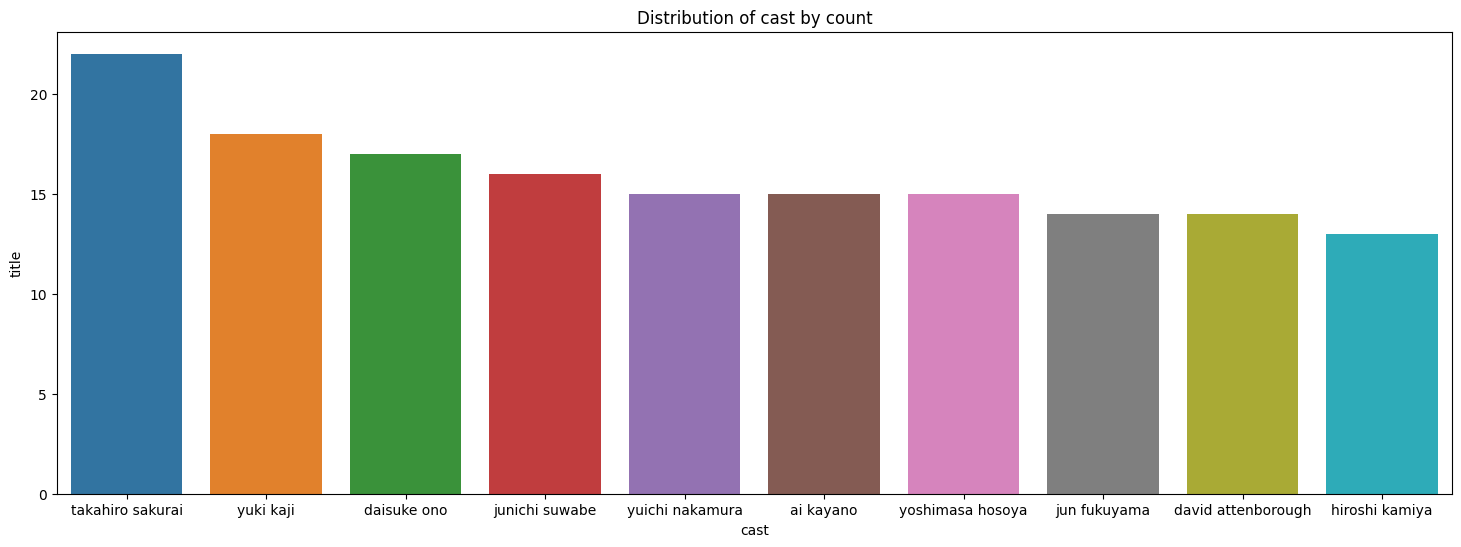

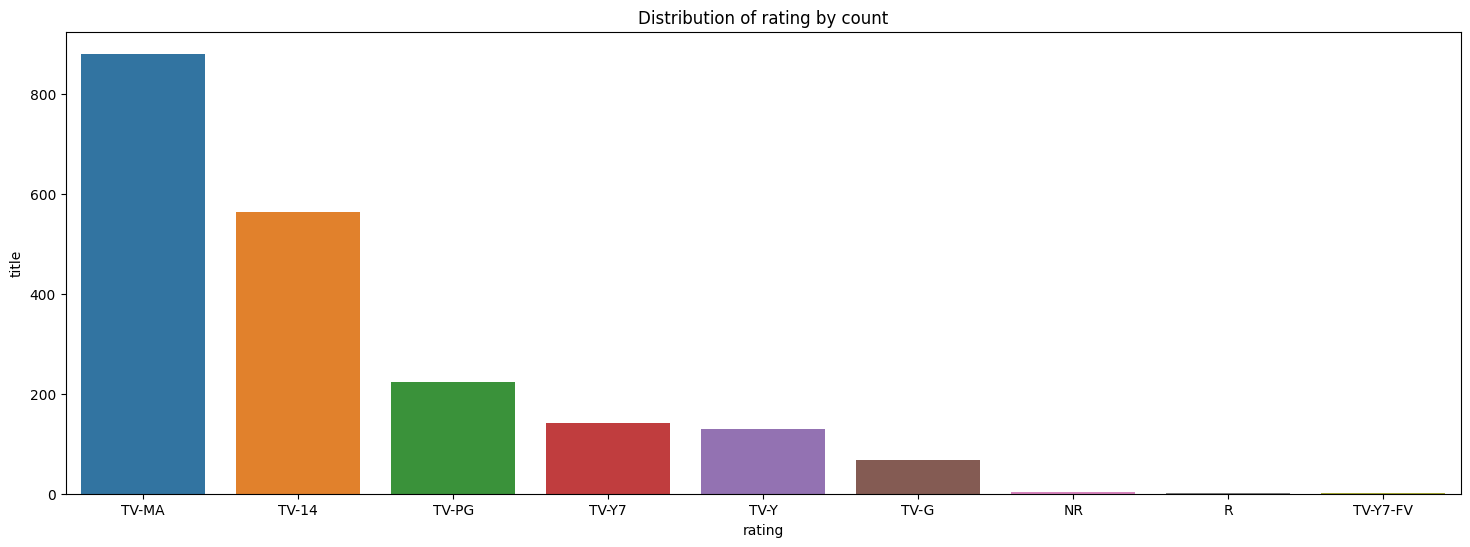

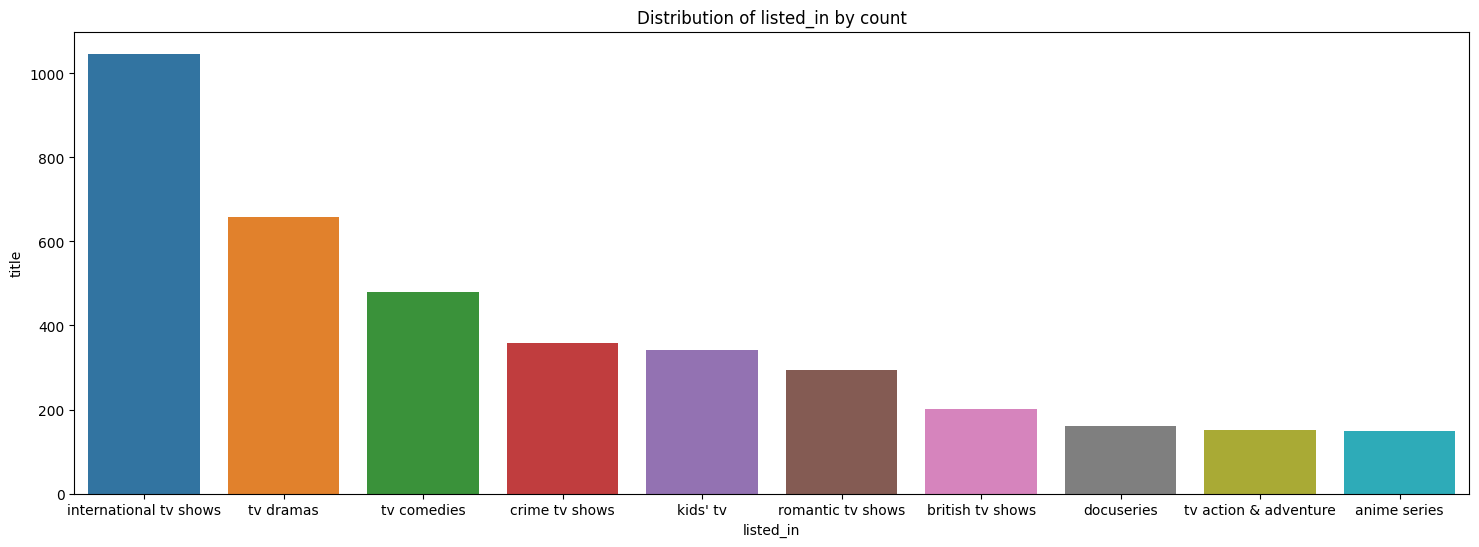

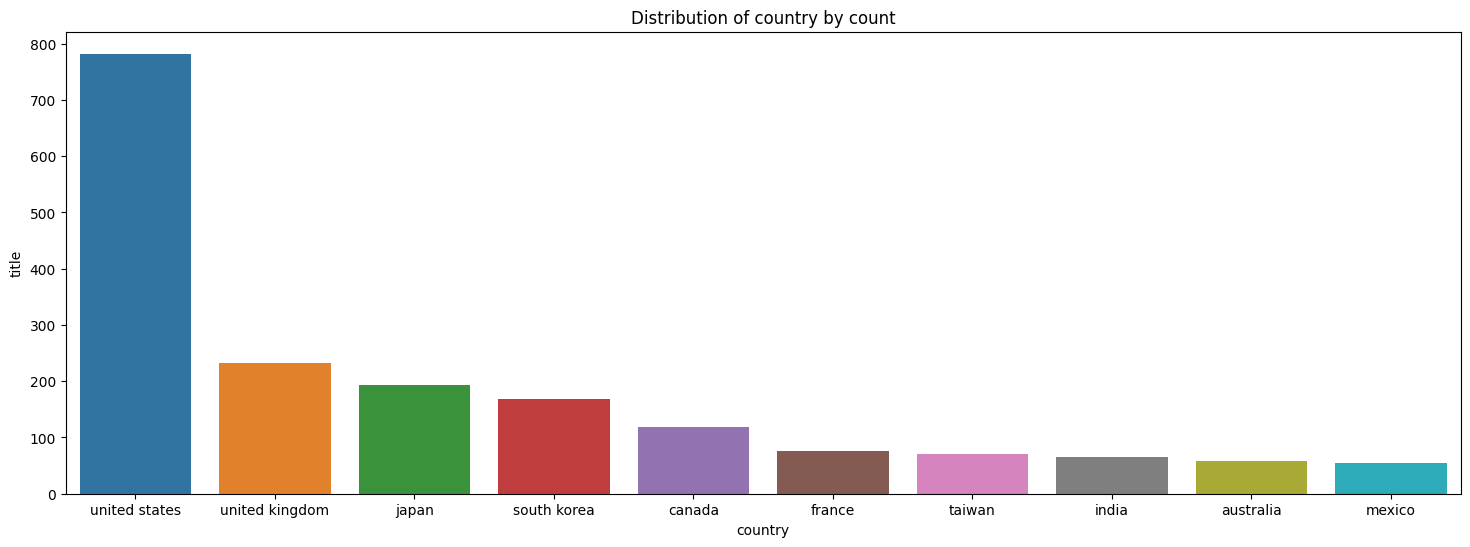

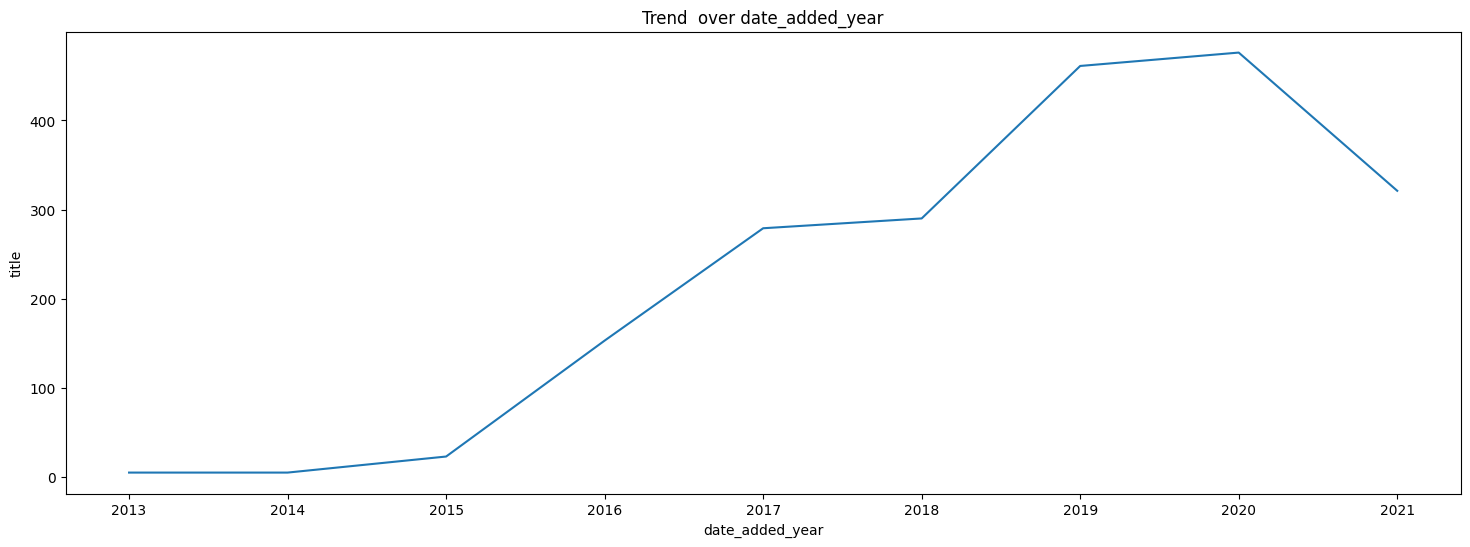

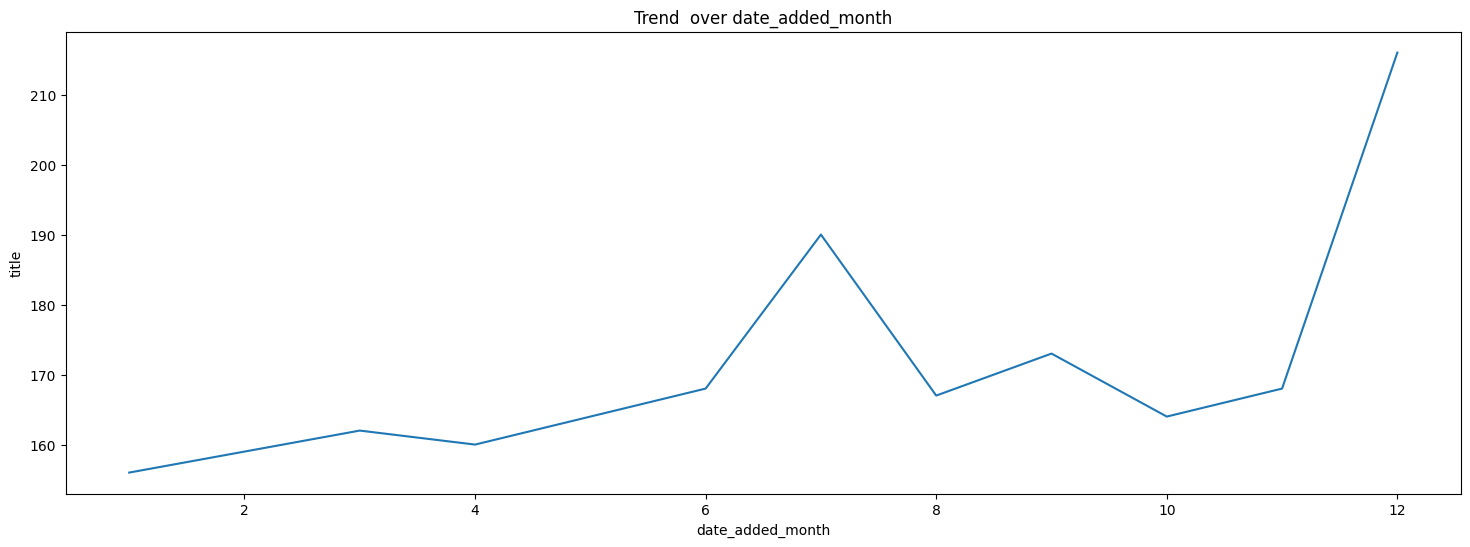

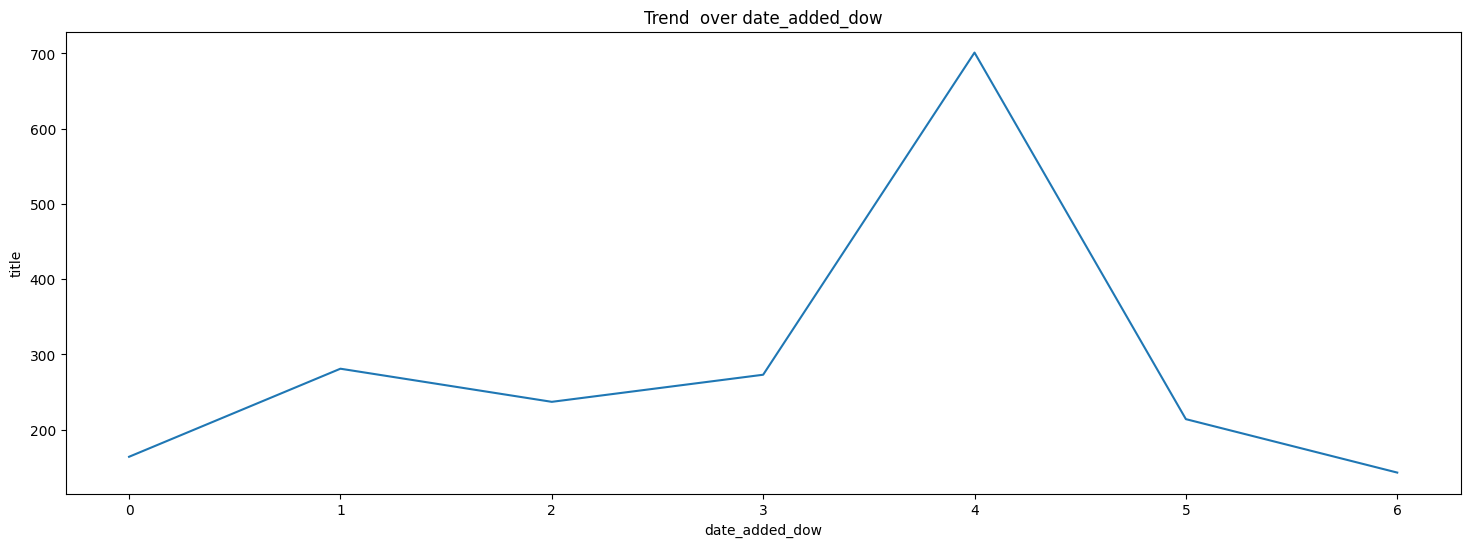

In [361]:
def analysis_plot_barchart(df, x_cols: list, y: str):

    title = y

    for items in x_cols: 
        df_shows_analysis = df[[items,title]].drop_duplicates().groupby(by=items).count().reset_index().sort_values(by=title, ascending=False).head(10)
        #print(df_shows_analysis)

        if items in ['date_added_year','date_added_month','date_added_dow']:
            # PLot barcharts 
            plt.figure(figsize= (18,6))
            plt.title(f'Trend  over {items}')
            sns.lineplot(data= df_shows_analysis, x= items, y = title)

        else:
            # PLot barcharts 
            plt.figure(figsize= (18,6))
            plt.title(f'Distribution of {items} by count')
            sns.barplot(data= df_shows_analysis, x= items, y = title)


analysis_plot_barchart(df_shows_nonna, x_cols = ['cast','rating','listed_in','country','date_added_year','date_added_month','date_added_dow'], y='title')

In [316]:
df_shows_nonna['listed_in'].unique()

array(['international tv shows', 'tv dramas', 'tv mysteries',
       'romantic tv shows', 'tv comedies', 'british tv shows',
       'reality tv', 'crime tv shows', 'spanish-language tv shows',
       'tv action & adventure', 'docuseries', "kids' tv",
       'tv sci-fi & fantasy', 'anime series', 'korean tv shows',
       'teen tv shows', 'tv horror', 'tv shows', 'classic & cult tv',
       'tv thrillers', 'science & nature tv',
       'stand-up comedy & talk shows'], dtype=object)

<Axes: xlabel='duration', ylabel='Density'>

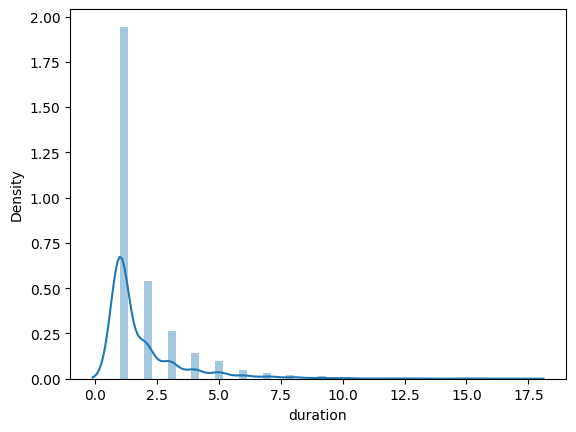

In [317]:
sns.distplot(df_shows_nonna[['title','duration']].drop_duplicates()['duration'].apply(lambda x: x.split(' ')[0]))

________________________________________________

## Lets us now explore the Movies

In [318]:
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [319]:
df_movie.reset_index(inplace= True)

In [320]:
df_movie.shape

(6131, 13)

In [321]:
df_movie.isnull().sum()

index             0
show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [322]:
((df_movie.isnull().sum())/ df_movie.shape[0])*100

index           0.000000
show_id         0.000000
type            0.000000
title           0.000000
director        3.066384
cast            7.747513
country         7.176643
date_added      0.000000
release_year    0.000000
rating          0.032621
duration        0.048932
listed_in       0.000000
description     0.000000
dtype: float64

In [323]:
## Let us check number of unique movies present 

df_movie['title'].nunique()

6131

In [324]:
df_movie['cast']

0                                                     NaN
1       Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
2       Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
3       Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
4       Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
                              ...                        
6126    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
6127    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
6128    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
6129    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
6130    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 6131, dtype: object

In [325]:
df_movie['country']

0                                           United States
1                                                     NaN
2       United States, Ghana, Burkina Faso, United Kin...
3                                           United States
4                                 Germany, Czech Republic
                              ...                        
6126                         United Arab Emirates, Jordan
6127                                        United States
6128                                        United States
6129                                        United States
6130                                                India
Name: country, Length: 6131, dtype: object

In [326]:
df_movie['listed_in']

0                                          Documentaries
1                               Children & Family Movies
2       Dramas, Independent Movies, International Movies
3                                       Comedies, Dramas
4                           Dramas, International Movies
                              ...                       
6126             Dramas, International Movies, Thrillers
6127                      Cult Movies, Dramas, Thrillers
6128                             Comedies, Horror Movies
6129                  Children & Family Movies, Comedies
6130      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [327]:
df_movie['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 23, 2021
               ...        
6126         March 9, 2016
6127     November 20, 2019
6128      November 1, 2019
6129      January 11, 2020
6130         March 2, 2019
Name: date_added, Length: 6131, dtype: object

We see from above that the date_added column is in string format. Let us change it to date

In [330]:
df_movie['date_added'] = pd.to_datetime(df_movie['date_added'], format= 'mixed')
df_movie['date_added_year'] = df_movie['date_added'].dt.year
df_movie['date_added_month'] = df_movie['date_added'].dt.month
df_movie['date_added_dow'] = df_movie['date_added'].dt.day_of_week

In [332]:
df_movie.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_dow
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,5
1,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,4
3,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,4
4,12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,3


In [333]:
df_movie.isnull().sum()

index                 0
show_id               0
type                  0
title                 0
director            188
cast                475
country             440
date_added            0
release_year          0
rating                2
duration              3
listed_in             0
description           0
date_added_year       0
date_added_month      0
date_added_dow        0
dtype: int64

### Lets us now change the cast into type list and then explode the dataframe on that. We will do the same for the column country and lisited_in. Eventually for the rows which still has nulls, we will drop them. 

checking for null in cast, country and listed_in column

In [335]:
df_movie['cast'].isnull().sum()

475

In [337]:
df_movie['country'].isnull().sum()

440

In [338]:
df_movie['listed_in'].isnull().sum()

0

since the null value is less than 10 percent of the movie data we will drop them

In [339]:
df_movie_nonna = df_movie.dropna(axis= 0)

In [340]:
df_movie_nonna.isnull().sum()

index               0
show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
date_added_year     0
date_added_month    0
date_added_dow      0
dtype: int64

since the data does not have any null values, we will work on cast, country and listed_in columns

In [341]:
df_movie_nonna['cast'] = df_movie_nonna['cast'].apply(lambda x: x.lower().split(', '))
df_movie_nonna['country'] = df_movie_nonna['country'].apply(lambda x: x.lower().split(', '))
df_movie_nonna['listed_in'] = df_movie_nonna['listed_in'].apply(lambda x: x.lower().split(', '))

In [344]:
df_movie_nonna = df_movie_nonna.explode(column= 'listed_in')


In [345]:
df_movie_nonna = df_movie_nonna.explode(column= 'country')


In [346]:
df_movie_nonna = df_movie_nonna.explode(column= 'cast')

In [347]:
df_movie_nonna

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_dow
2,7,s8,Movie,Sankofa,Haile Gerima,kofi ghanaba,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,oyafunmike ogunlano,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,alexandra duah,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,nick medley,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,mutabaruka,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,8806,s8807,Movie,Zubaan,Mozez Singh,manish chaudhary,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5
6130,8806,s8807,Movie,Zubaan,Mozez Singh,meghna malik,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5
6130,8806,s8807,Movie,Zubaan,Mozez Singh,malkeet rauni,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5
6130,8806,s8807,Movie,Zubaan,Mozez Singh,anita shabdish,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5


In [348]:
df_movie_nonna['duration'].unique()

array(['125 min', '104 min', '127 min', '166 min', '103 min', '97 min',
       '106 min', '96 min', '124 min', '116 min', '98 min', '91 min',
       '115 min', '122 min', '99 min', '88 min', '100 min', '102 min',
       '93 min', '95 min', '85 min', '83 min', '182 min', '147 min',
       '90 min', '128 min', '143 min', '119 min', '114 min', '118 min',
       '108 min', '117 min', '121 min', '142 min', '113 min', '154 min',
       '120 min', '82 min', '94 min', '109 min', '101 min', '105 min',
       '86 min', '229 min', '76 min', '89 min', '110 min', '156 min',
       '112 min', '129 min', '107 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '145 min', '92 min', '64 min', '59 min',
       '111 min', '87 min', '148 min', '189 min', '141 min', '130 min',
       '68 min', '131 min', '126 min', '155 min', '123 min', '84 min',
       '13 min', '77 min', '74 min', '49 min', '72 min', '78 min',
       '70 min', '132 min', '140 min', '81 min', '138 min', '149 min',
       '

## Lets do some visualization

In [349]:
df_movie_nonna

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_dow
2,7,s8,Movie,Sankofa,Haile Gerima,kofi ghanaba,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,oyafunmike ogunlano,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,alexandra duah,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,nick medley,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
2,7,s8,Movie,Sankofa,Haile Gerima,mutabaruka,united states,2021-09-24,1993,TV-MA,125 min,dramas,"On a photo shoot in Ghana, an American model s...",2021,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,8806,s8807,Movie,Zubaan,Mozez Singh,manish chaudhary,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5
6130,8806,s8807,Movie,Zubaan,Mozez Singh,meghna malik,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5
6130,8806,s8807,Movie,Zubaan,Mozez Singh,malkeet rauni,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5
6130,8806,s8807,Movie,Zubaan,Mozez Singh,anita shabdish,india,2019-03-02,2015,TV-14,111 min,music & musicals,A scrappy but poor boy worms his way into a ty...,2019,3,5


In [350]:
df_movie_nonna['country'].value_counts() / df_movie_nonna['title'].nunique()

country
united states     7.709740
india             3.852652
united kingdom    1.536933
france            1.124976
canada            0.951591
                    ...   
sri lanka         0.000386
iraq              0.000386
afghanistan       0.000386
panama            0.000386
nicaragua         0.000193
Name: count, Length: 113, dtype: float64

<Axes: xlabel='duration', ylabel='Density'>

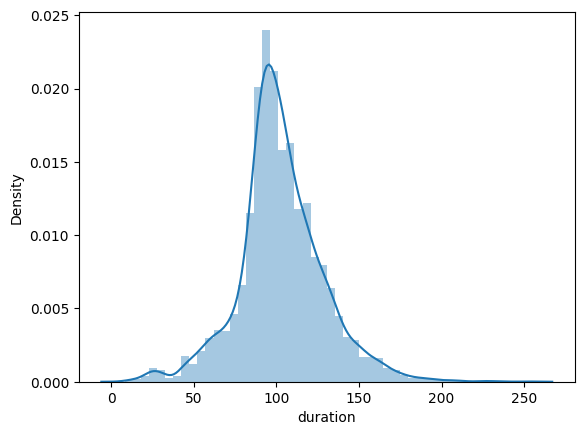

In [364]:
sns.distplot(df_movie_nonna[['title','duration']].drop_duplicates()['duration'].apply(lambda x: x.split(' ')[0]))

In [354]:
df_movie_nonna[['cast','title']].groupby(by='cast').count().reset_index().sort_values(by='title', ascending=False).head(10)

,cast,title
1975,anupam kher,118
20652,shah rukh khan,107
16309,naseeruddin shah,94
596,akshay kumar,88
17136,om puri,87
17371,paresh rawal,85
3166,boman irani,84
1228,amitabh bachchan,76
13270,liam neeson,69
11731,kareena kapoor,69


The above value had duplicates because of the explosion

In [355]:
df_movie_actors = df_movie_nonna[['cast','title']].drop_duplicates().groupby(by='cast').count().reset_index().sort_values(by='title', ascending=False).head(10)

df_movie_actors

,cast,title
1975,anupam kher,42
20652,shah rukh khan,34
16309,naseeruddin shah,31
17136,om puri,30
596,akshay kumar,30
17371,paresh rawal,28
1228,amitabh bachchan,28
3166,boman irani,27
11731,kareena kapoor,25
20057,samuel l. jackson,21


In [356]:
df_movie_nonna.shape

(124267, 16)

## Genre, Cast and country analysis

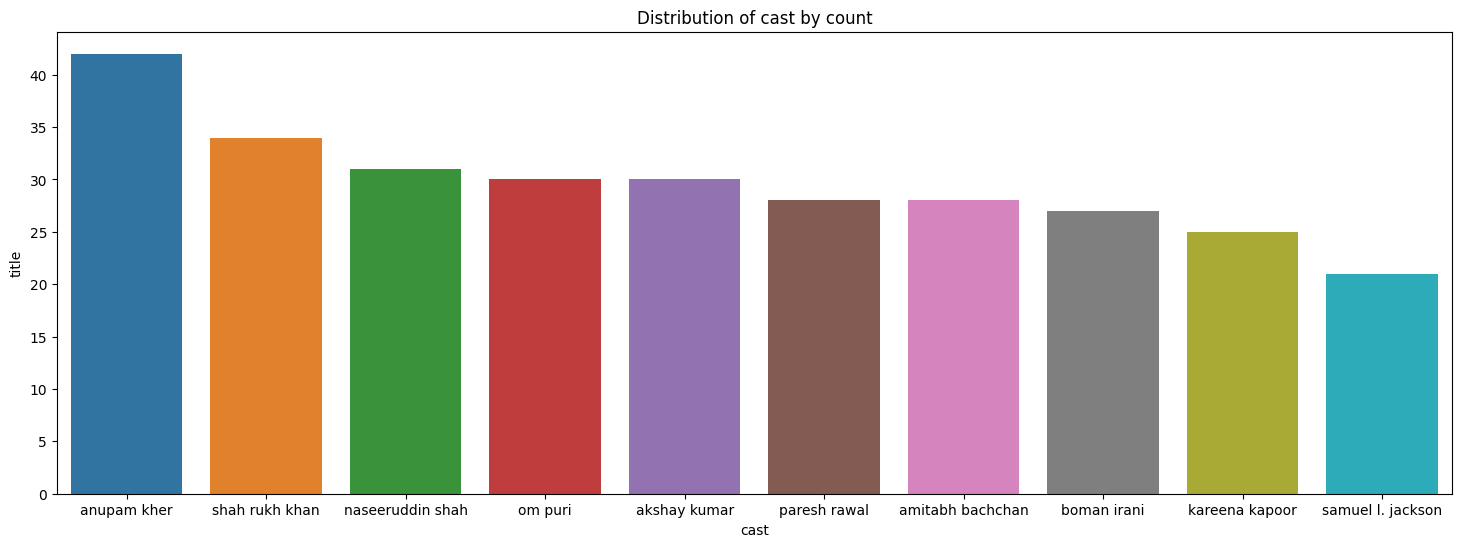

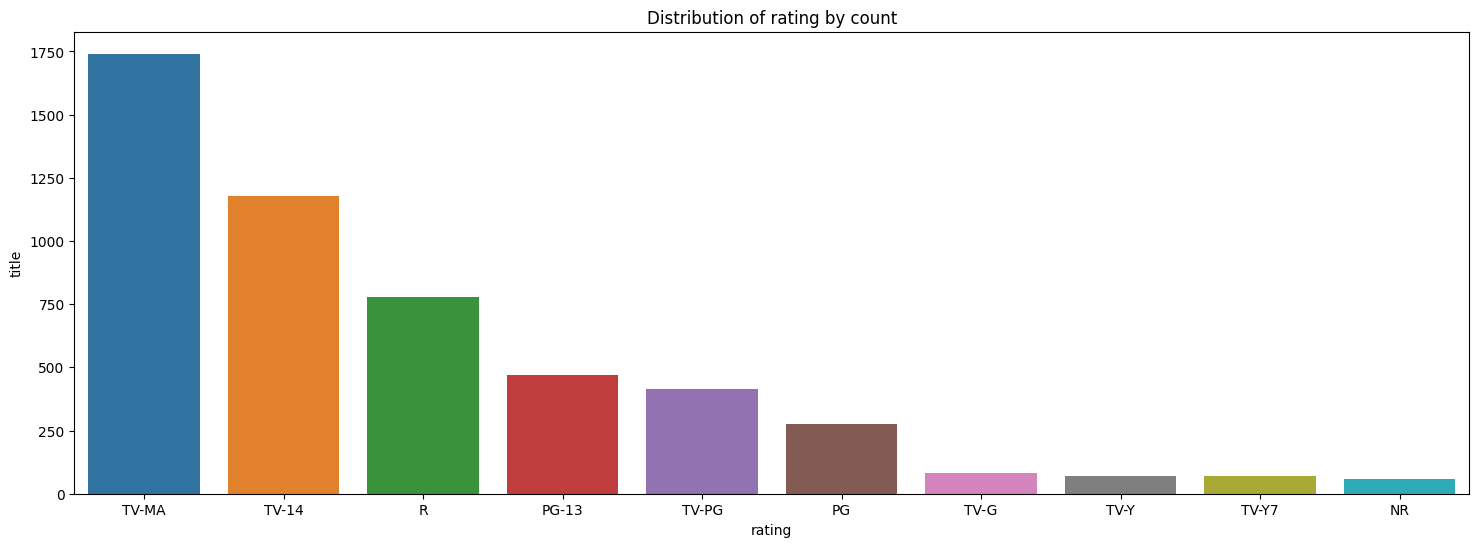

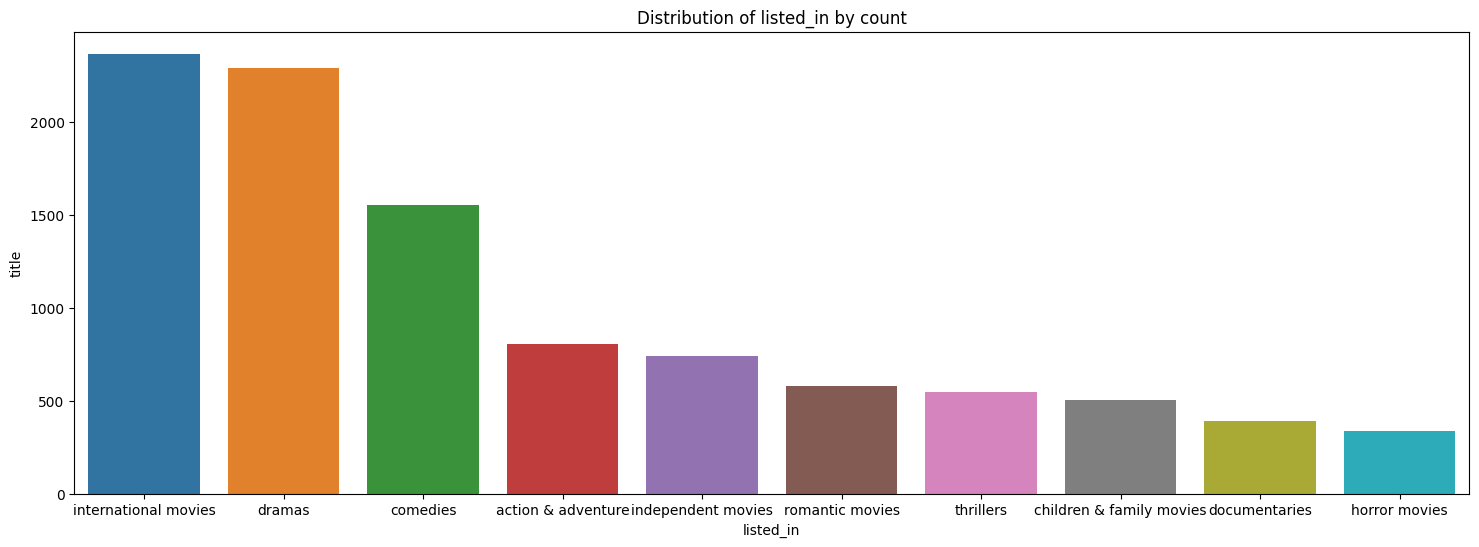

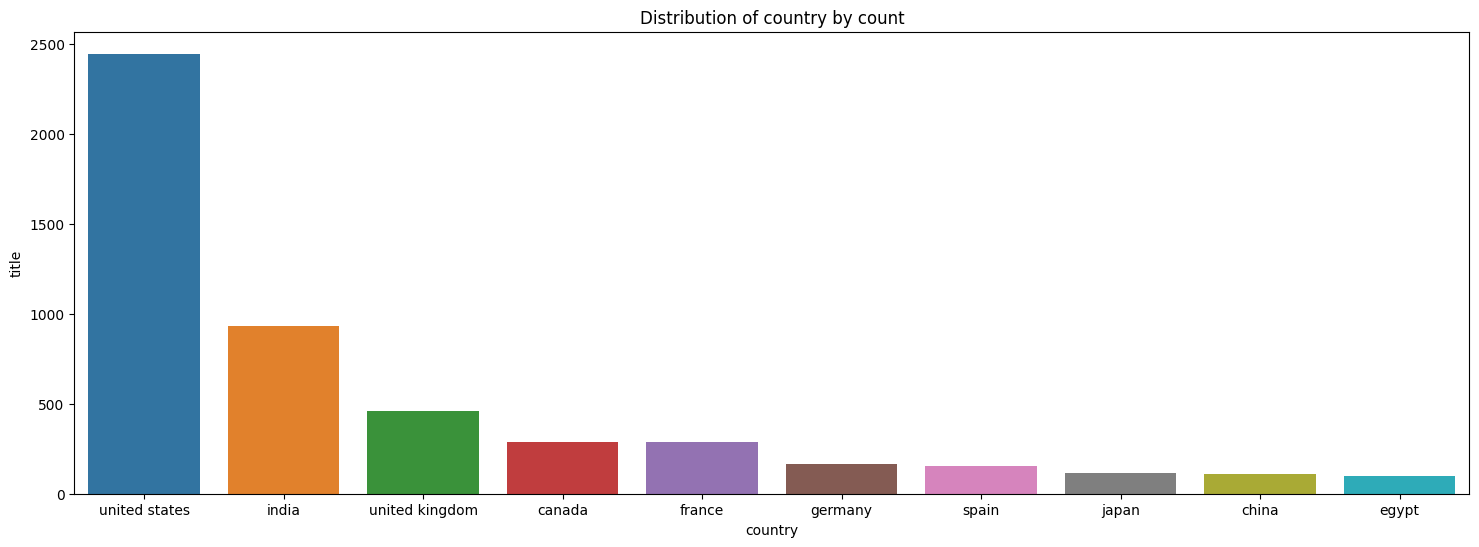

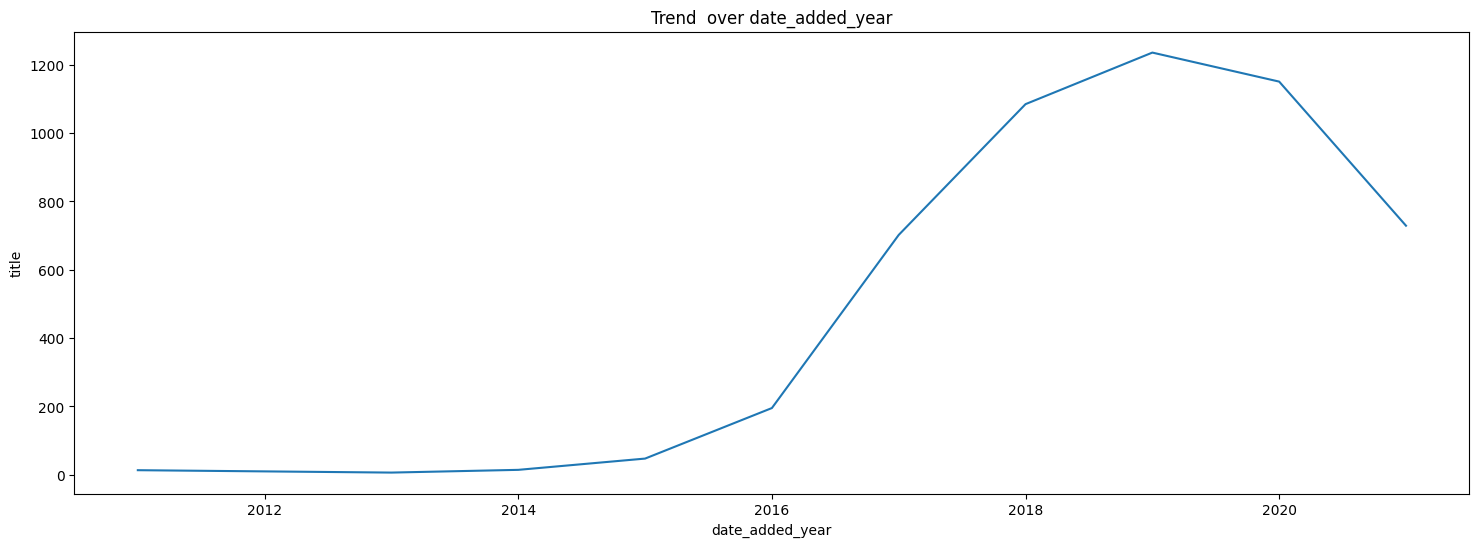

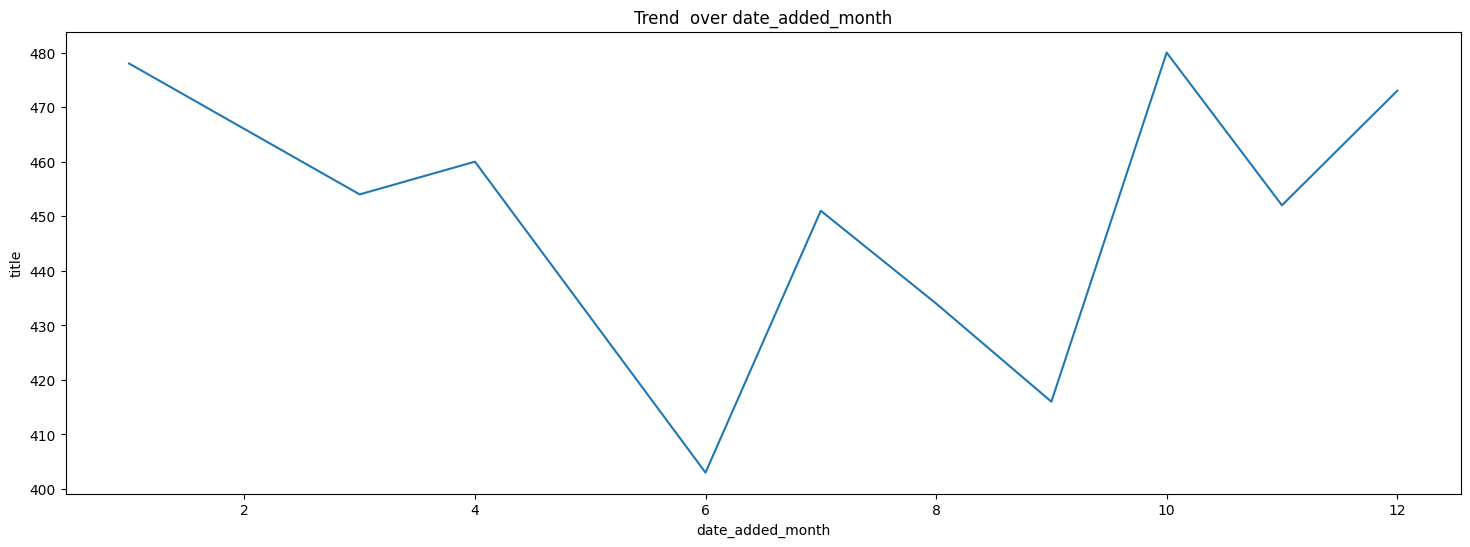

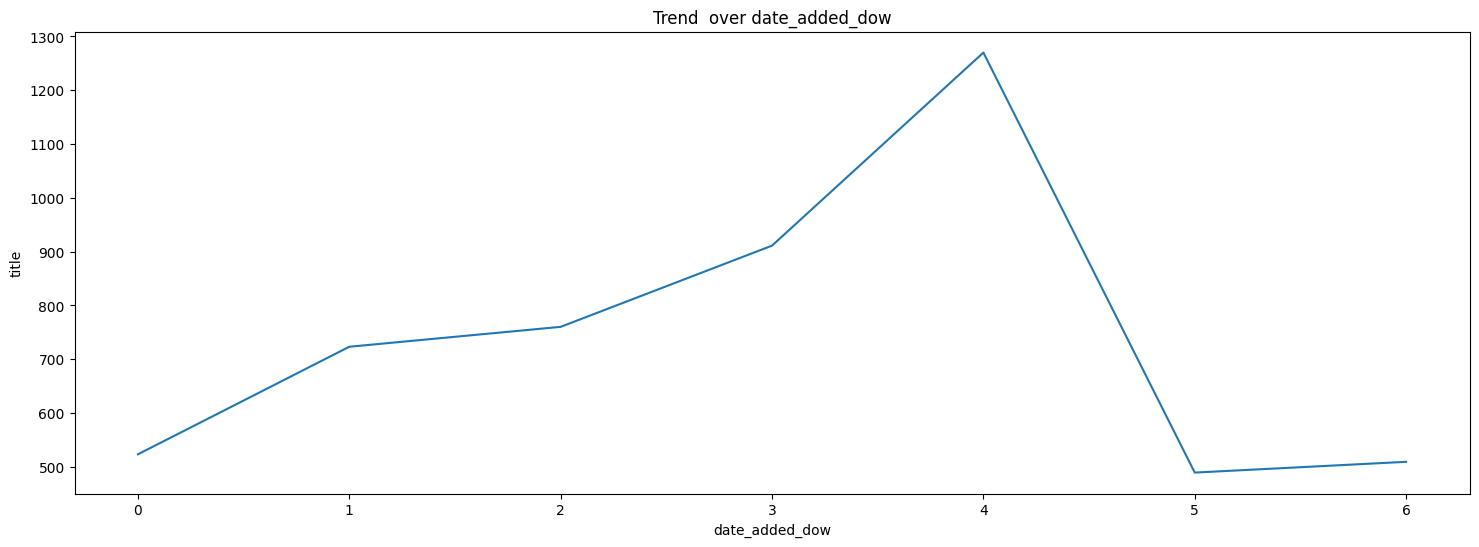

In [362]:
analysis_plot_barchart(df_movie_nonna, x_cols = ['cast','rating','listed_in','country','date_added_year','date_added_month','date_added_dow'], y='title')